## Contents

1. [Importing Libraries](#1.-Importing-Libraries)     
	1.1. [Importing Dataframes](#1.1-Importing-Dataframes)      
2. [Checking the busiest hours by aggregating the sum of prices](#2.-Checking-the-busiest-hours-by-aggregating-the-sum-of-prices)   
	2.1. [Creating a bar chart to show department orders at 10am](#2.1-Creating-a-bar-chart-to-show-department-orders-at-10am)    
	2.2. [Creating a bar chart to show department orders at 3am](#2.2-Creating-a-bar-chart-to-show-department-orders-at-3am)    
	2.3. [Exporting bar chart visualisations](#2.3-Exporting-bar-chart-visualisations)    
3. [Checking the most popular products in departments 4 and 16](#3.-Checking-the-most-popular-products-in-departments-4-and-16)      
4. [Checking to see what products are found in mid-range/ low-range products](#4.-Checking-to-see-what-products-are-found-in-mid-range/-low-range-products)    
5. [Creating a bar chart to show customer loyalty](#5.-Creating-a-bar-chart-to-show-customer-loyalty)    
	5.1. [Exporting customer loyalty bar chart](#5.1-Exporting-customer-loyalty-bar-chart)    
6. [Conducting some exploratory analysis of customer demographics to inform the targeted marketing campaigns](#6.-Conducting-some-exploratory-analysis-of-customer-demographics-to-inform-the-targeted-marketing-campaigns)      
	6.1.[Creating a scatterplot exploring the relationship between age and family status](#6.1-Creating-a-scatterplot-exploring-the-relationship-between-age-and-family-status)     
	6.2. [Exporting scatterplot visualisation as 'png'](#6.2-Exporting-scatterplot-visualisation-as-'png')    
7. [Creating and Exporting a bar chart to show the average prices by order_hour_of_day](#7.-Creating-and-Exporting-a-bar-chart-to-show-the-average-prices-by-order-hour-of-day)    
8. [Creating and Exporting a bar chart showing the sum of prices by order_hour_of_day](#8.-Creating-and-Exporting-a-bar-chart-showing-the-sum-of-prices-by-order-hour-of-day)    
9. [Checking the basic statistics of prices](#9.-Checking-the-basic-statistics-of-prices)    
10. [Checking the products in the bulk and missing departments](#10.-Checking-the-products-in-the-bulk-and-missing-departments)    

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1.2. Importing Dataframes

In [2]:
path = r'C:\Users\User 1\Documents\Instacart Basket Analysis 04-2023'

In [3]:
# Importing dataset
df_final_dataset = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_dataset.pkl'))

In [4]:
df_final_dataset.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,...,avg_price,spending_flag,median_frequency,order_frequency_flag,region,activity_flag,age_profile,income_flag,family_profile,dependant_status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,7.988889,Low spender,19.0,Regular customer,Midwest,active,40-60,High-income,Middle-aged with children,with children


In [5]:
df_final_dataset.shape

(32404859, 37)

## 2. Checking the busiest hours by aggregating the sum of prices

In [6]:
# Checking the busiest hours by aggregating the sum of prices.
busiest_hours_price = df_final_dataset.groupby('order_hour_of_day').agg({'prices' : ['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_hours_price

,prices
,sum
order_hour_of_day,
10,21401143.73
11,21263117.84
14,20980726.82
15,20778397.54
13,20735913.96
12,20394080.92
16,19779059.42
9,19026993.59


### 2.1. Creating a bar chart to show department orders at 10am

In [7]:
# Creating a bar chart to show what departments are most popular at 10am.
busiest_hour_department = df_final_dataset[df_final_dataset['order_hour_of_day'] == 10]

In [8]:
busiest_hour_department_count = busiest_hour_department['department_id'].value_counts(dropna = False)

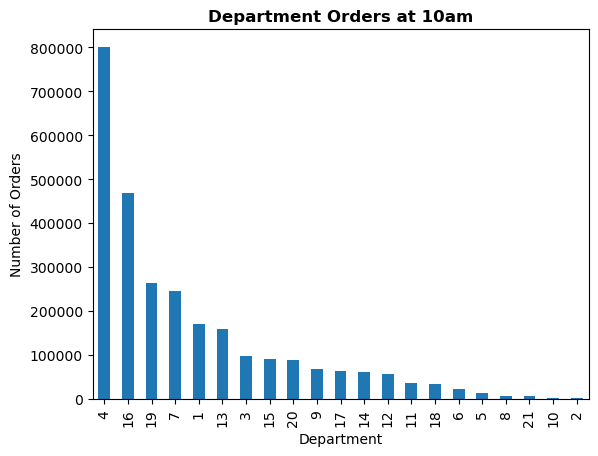

In [9]:
busiest_department = busiest_hour_department_count.plot.bar(legend = None)
plt.title('Department Orders at 10am', fontweight = 'bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

### 2.2. Creating a bar chart to show department orders at 3am

In [10]:
quietest_hour_department = df_final_dataset[df_final_dataset['order_hour_of_day'] == 3]

In [11]:
quietest_hour_department_count = quietest_hour_department['department_id'].value_counts(dropna = False)

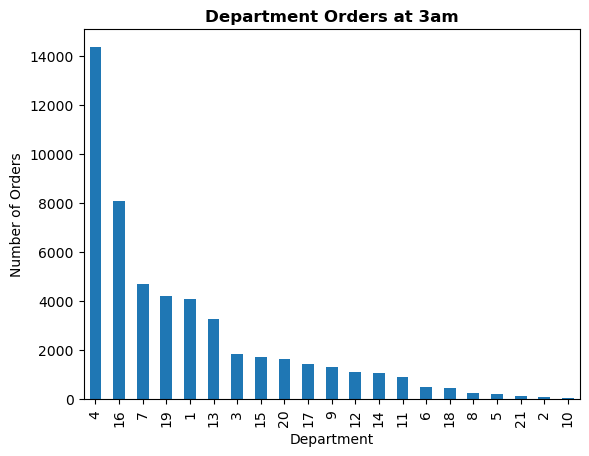

In [12]:
quietest_department = quietest_hour_department_count.plot.bar(legend = None)
plt.title('Department Orders at 3am', fontweight = 'bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

### 2.3. Exporting bar chart visualisations

In [13]:
# exporting visualisations
busiest_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'busiest_department_bar.png'))

In [14]:
quietest_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'quietest_department_bar.png'))

## 3. Checking the most popular products in departments 4 and 16

In [15]:
# Checking the most popular products in departments 4 and 16
department_produce = df_final_dataset[df_final_dataset['department_id'] == 4]

In [16]:
popular_products_produce = department_produce['product_name'].value_counts(dropna = False)

In [17]:
popular_products_produce.head(20)

Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Seedless Red Grapes          82689
Name: product_name, dtype: int64

In [18]:
department_dairy_eggs = df_final_dataset[df_final_dataset['department_id'] == 16]
popular_products_dairy_eggs = department_dairy_eggs['product_name'].value_counts(dropna = False)

In [19]:
popular_products_dairy_eggs.head(20)

Organic Whole Milk                                                137905
Organic Half & Half                                                76360
Half & Half                                                        69217
Organic Whole String Cheese                                        59676
Organic Unsweetened Almond Milk                                    57895
Unsweetened Almondmilk                                             49569
Organic Reduced Fat 2% Milk                                        47839
Grated Parmesan                                                    45238
Large Alfresco Eggs                                                40376
Organic Grade A Free Range Large Brown Eggs                        40045
2% Reduced Fat Milk                                                37091
Shredded Parmesan                                                  36365
Unsalted Butter                                                    35667
Organic Reduced Fat Milk                           

In [20]:
department_snacks = df_final_dataset[df_final_dataset['department_id'] == 19]
popular_products_snacks = department_snacks['product_name'].value_counts(dropna = False)

In [21]:
popular_products_snacks.head(20)

Lightly Salted Baked Snap Pea Crisps                   24950
Original Veggie Straws                                 16850
Sea Salt Pita Chips                                    16626
Pretzel Crisps Original Deli Style Pretzel Crackers    15831
Sea Salt & Vinegar Potato Chips                        14800
Chocolate Chip Cookies                                 14148
Organic Tortilla Chips                                 13776
Baked Aged White Cheddar Rice and Corn Puffs           13691
Organic Bunny Fruit Snacks Berry Patch                 13372
Sea Salt Potato Chips                                  13086
Organic Blue Corn Tortilla Chips                       13040
Almonds & Sea Salt in Dark Chocolate                   12905
100 Calorie  Per Bag Popcorn                           12822
Organic Whole Cashews                                  12816
Organic Summer Strawberry Bunny Fruit Snacks           12568
Whole Almonds                                          12474
Organic Thompson Seedles

In [22]:
department_beverages = df_final_dataset[df_final_dataset['department_id'] == 7]
popular_products_beverages = department_beverages['product_name'].value_counts(dropna = False)

In [23]:
popular_products_beverages.head(20)

Sparkling Water Grapefruit                    75886
Spring Water                                  56087
Lime Sparkling Water                          46546
Sparkling Natural Mineral Water               42934
100% Raw Coconut Water                        37973
Soda                                          35791
Sparkling Lemon Water                         32788
Italian Sparkling Mineral Water               30937
Pure Sparkling Water                          28884
Original Orange Juice                         24918
Peach Pear Flavored Sparkling Water           21233
Electrolyte Enhanced Water                    20735
Organic Raw Kombucha Gingerade                20707
Lemonade                                      19692
Natural Spring Water                          19518
Original No Pulp 100% Florida Orange Juice    19345
Fridge Pack Cola                              18269
Pure Coconut Water                            18183
Sparkling Mineral Water                       18161
Sparkling Wa

In [24]:
department_frozen = df_final_dataset[df_final_dataset['department_id'] == 1]
popular_products_frozen = department_frozen['product_name'].value_counts(dropna = False)

In [25]:
popular_products_frozen.head(20)

Blueberries                          55946
Organic Broccoli Florets             32887
Organic Whole Strawberries           31445
Frozen Organic Wild Blueberries      29905
Pineapple Chunks                     24950
Organic Frozen Peas                  20228
Chicken & Maple Breakfast Sausage    18602
Mango Chunks                         17699
Macaroni & Cheese                    17420
Frozen Broccoli Florets              15458
Organic Cheese Frozen Pizza          14313
Organic Brown Rice                   14276
Berry Medley                         14227
Gluten Free Whole Grain Bread        13715
Chocolate Ice Cream                  13273
Vanilla Ice Cream                    12117
Organic Chopped Spinach              11925
Green Peas                           11253
Organic Chicken Strips               11110
Organic Multigrain Waffles           10704
Name: product_name, dtype: int64

## 4. Checking to see what products are found in mid-range/ low-range products

In [26]:
# Checking to see what products are found in mid-range/ low-range products? 
product_name_mid_range = df_final_dataset[df_final_dataset['price_range_loc'] == 'Mid-range product']

In [27]:
popular_mid_range_products = product_name_mid_range['product_name'].value_counts(dropna = False)

In [28]:
popular_mid_range_products.head(20)

Banana                                  472565
Bag of Organic Bananas                  379450
Organic Strawberries                    264683
Organic Baby Spinach                    241921
Organic Avocado                         176815
Large Lemon                             152657
Limes                                   140627
Organic Whole Milk                      137905
Organic Garlic                          109778
Organic Zucchini                        104823
Organic Blueberries                     100060
Cucumber Kirby                           97315
Apple Honeycrisp Organic                 85020
Organic Grape Tomatoes                   84255
Organic Cucumber                         80392
Organic Baby Carrots                     76896
Organic Large Extra Fancy Fuji Apple     75165
Organic Gala Apples                      72846
Carrots                                  72736
Fresh Cauliflower                        71584
Name: product_name, dtype: int64

In [29]:
product_name_low_range = df_final_dataset[df_final_dataset['price_range_loc'] == 'Low-range product']
popular_low_range_products = product_name_low_range['product_name'].value_counts(dropna = False)

In [30]:
popular_low_range_products.head(20)


Organic Hass Avocado                 213584
Strawberries                         142951
Organic Raspberries                  137057
Organic Yellow Onion                 113426
Organic Fuji Apple                    89632
Organic Lemon                         87746
Seedless Red Grapes                   82689
Honeycrisp Apple                      79769
Organic Half & Half                   76360
Sparkling Water Grapefruit            75886
Yellow Onions                         73167
Organic Baby Arugula                  72829
Organic Cilantro                      69524
Organic Granny Smith Apple            58779
Organic Unsweetened Almond Milk       57895
Raspberries                           57640
Spring Water                          56087
Organic Peeled Whole Baby Carrots     55371
Red Peppers                           55280
Red Vine Tomato                       54409
Name: product_name, dtype: int64

## 5. Creating a bar chart to show customer loyalty

<function matplotlib.pyplot.show(close=None, block=None)>

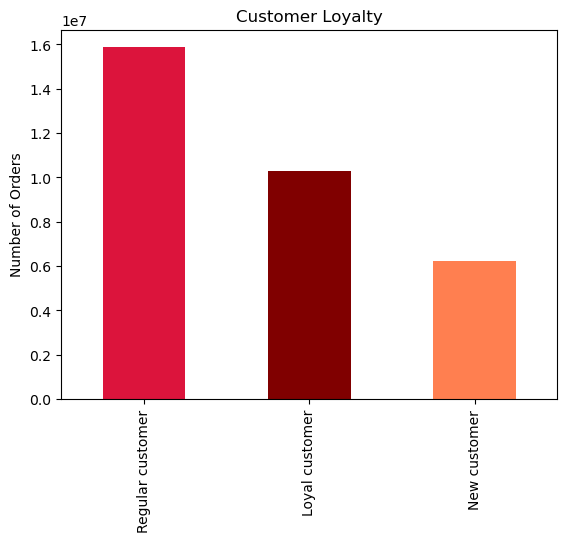

In [31]:
barchart_customer_loyalty = df_final_dataset['loyalty_flag'].value_counts().plot.bar(color= ['crimson', 'maroon', 'coral'])
plt.title('Customer Loyalty')
plt.ylabel('Number of Orders')
plt.show

### 5.1. Exporting customer loyalty bar chart

In [32]:
# Exporting Customer Loyalty Bar Chart
barchart_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customer_loyalty_bar.png'))

## 6. Conducting some exploratory analysis of customer demographics to inform the targeted marketing campaigns

### 6.1. Creating a scatterplot exploring the relationship between age and family status

In [33]:
# Creating a scatterplot to show the relationship between age and family status
df_age_family_status = df_final_dataset[['age', 'family_status']]

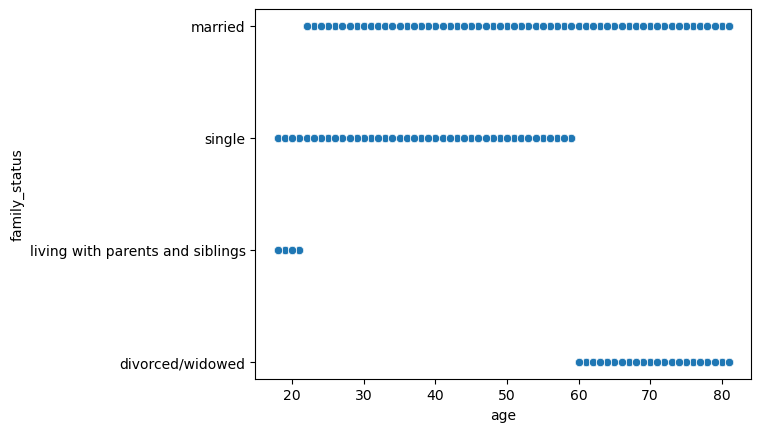

In [34]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'family_status', data = df_age_family_status)

In [ ]:
plt.boxplot(df_age_family_status)

### 6.2. Exporting scatterplot visualisation as 'png'

In [35]:
# Exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatterplot_age_income.png'))

## 7. Creating and Exporting a bar chart to show the average prices by order_hour_of_day

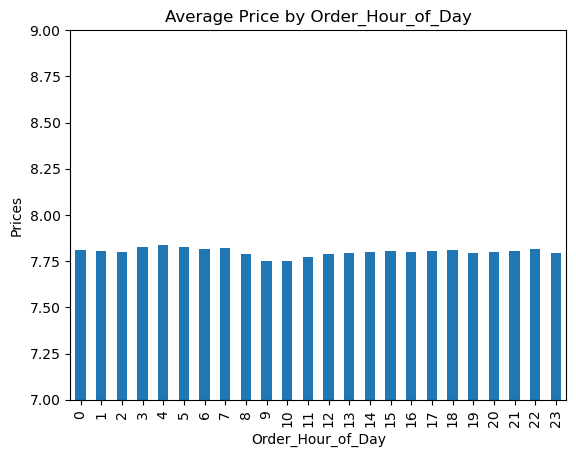

In [36]:
bar_order_hour_of_day_price_avg = df_final_dataset.groupby('order_hour_of_day').agg({'prices': ['mean']}).plot.bar(legend='')
plt.xlabel('Order_Hour_of_Day')
plt.ylabel('Prices')
plt.title('Average Price by Order_Hour_of_Day')
plt.ylim(7, 9)
plt.show()

In [37]:
# Export bar chart
bar_order_hour_of_day_price_avg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_order_hour_of_day_price_avg.png'))


## 8. Creating and Exporting a bar chart showing the sum of prices by order_hour_of_day

In [38]:
df_final_dataset.groupby('order_hour_of_day').agg({'prices': ['sum']})

,prices
,sum
order_hour_of_day,
0,1708684.33
1,903012.83
2,541001.15
3,401358.97
4,417288.40
5,688482.23
6,2270795.77
7,6967455.09


Text(0, 0.5, 'prices')

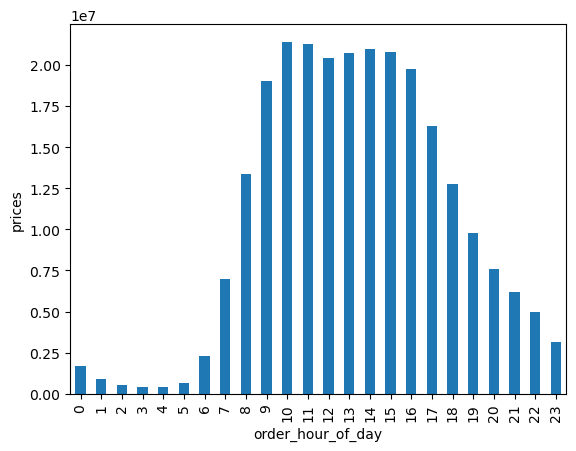

In [39]:
bar_order_hour_of_day_price_sum = df_final_dataset.groupby('order_hour_of_day').agg({'prices': ['sum']}).plot.bar(legend='')
plt.xlabel('order_hour_of_day')
plt.ylabel('prices')

In [40]:
# Export bar chart
bar_order_hour_of_day_price_sum.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_order_hour_of_day_price_sum.png'))


## 9. Checking the basic statistics of prices

In [41]:
df_final_dataset['prices'].describe()

count    3.240486e+07
mean     7.790180e+00
std      4.242125e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

## 10. Checking the products in the bulk and missing departments

In [42]:
department_bulk = df_final_dataset[df_final_dataset['department_id'] == 10]
department_bulk_freq = department_bulk['product_name'].value_counts(dropna = False)
department_bulk_freq.head(20)

Dried Mango                          10150
Organic Rolled Oats                   6380
Organic Black Mission Figs            2793
Apricots                              2610
Rolled Oats                           1364
Organic Quick Rolled Oats             1344
Pesto Sauce                           1266
Organic Royal Rainbow Quinoa          1249
Organic Short Brown Sprouted Rice      826
Organic Turkish Apricots               780
Israeli Couscous                       764
Vegetable Chips                        711
Whole Medjool Dates                    550
Organic Red Kidney Beans               502
Organic Mung Beans                     499
Organic Pearled Barley                 403
Organic Split Green Peas               346
Organic Hemp Plus Granola              301
Super Nutty Granola                    204
Organic Brown Jasmine Rice             172
Name: product_name, dtype: int64

In [43]:
department_missing = df_final_dataset[df_final_dataset['department_id'] == 21]
department_missing_freq = department_missing['product_name'].value_counts(dropna = False)
department_missing_freq.head(30)

Organic Riced Cauliflower                                                 8366
Peanut Butter Ice Cream Cup                                               1933
Organic Mango Yogurt                                                      1675
Organic Celery Bunch                                                      1645
Natural Lemon Flavored Sparkling Water                                    1455
Organic Whole Milk Washington Black Cherry Yogurt                         1391
Cookie Dough Ice Cream Chocolate Chip                                     1311
Soy & Dairy Free Plain Unsweetened Almond Milk Yogurt                     1005
Organic Nondairy Strawberry Cashew Yogurt                                  914
Cayenne Cleanse Kombucha                                                   904
Uncured Beef Hot Dog                                                       873
Organic Plain Unsweetened Nondairy Cashew Yogurt                           868
Organic Ground Chicken                              